In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [110]:
#function to convert strings to dates :)
def string_to_datetime(string):
    try:
        result = datetime.strptime(string, "%Y-%m-%d") 
    except:
        result = string      
    return result

In [111]:
h100_subcharts = pd.read_csv('hot100_radio_streaming_sales_Kpop.csv', converters={'chart_date':string_to_datetime, 
                                                                                    'chart_date_radio':string_to_datetime,
                                                                                    'chart_date_sales':string_to_datetime,
                                                                                    'chart_date_streaming':string_to_datetime})
wdss = pd.read_csv('wdss.csv', converters={'chart_date':string_to_datetime})

In [112]:
h100_subcharts.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Unnamed: 0.1.1.1.1', 'chart_date', 'artist', 'song_title_x',
       'Original URL', 'original_lyrics', 'English Translation URL',
       'translated_lyrics', 'peak_position', 'chart_weeks', 'english_lyrics',
       'english_count', 'total_count', 'translated_sentiment',
       'english_sentiment', 'valence', 'danceability', 'main_artist',
       'search_title', 'scaled_valence', 'chart_date_radio', 'song_title_y',
       'peak_position_radio', 'chart_weeks_radio', 'chart_date_streaming',
       'song_title_x.1', 'peak_position_streaming', 'chart_weeks_streaming',
       'chart_date_sales', 'song_title_y.1', 'peak_position_sales',
       'chart_weeks_sales', 'missing_lyrics', 'spotify_id',
       'missing_lyrics_post', 'english_unique', 'total_unique',
       'english_percentage'],
      dtype='object')

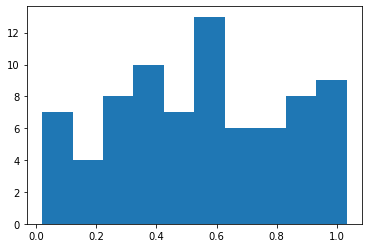

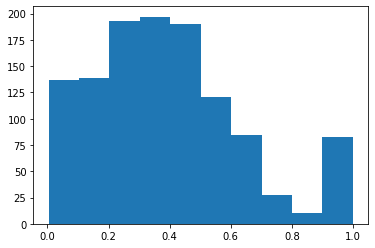

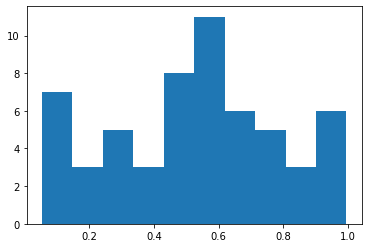

In [113]:
##compare percentage of english over time in both datasets
plt.hist(h100_subcharts['english_percentage'])
plt.show()
plt.hist(wdss.loc[wdss['peak_position'] > 1]['english_percentage'])
plt.show()
plt.hist(wdss.loc[wdss['peak_position'] <= 1]['english_percentage'])
plt.show()

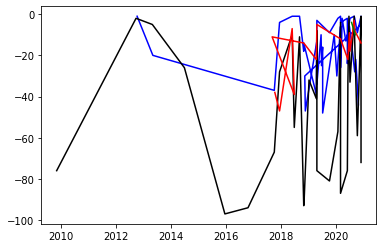

radio average % english 0.9642857142857143
streaming average % english 0.7281333730934844
sales average % english 0.5203071639240637
h100 average % english 0.6646930337256934


In [98]:
##compare billboard across streaming platforms
h100_subcharts.sort_values('chart_date', inplace=True) # sort by date

sales = h100_subcharts.loc[h100_subcharts['peak_position_sales'] > 0]
plt.plot(sales['chart_date_sales'], -1 * sales['peak_position_sales'], '-', color='blue')

h100 = h100_subcharts.loc[h100_subcharts['peak_position'] > 0]
plt.plot(h100['chart_date'], -1 * h100['peak_position'], '-', color='black')

streaming = h100_subcharts.loc[h100_subcharts['peak_position_streaming'] > 0]
plt.plot(streaming['chart_date_streaming'], -1 * streaming['peak_position_streaming'], '-', color='red')

radio = h100_subcharts.loc[h100_subcharts['peak_position_radio'] > 0]
plt.plot(radio['chart_date_radio'], -1 * radio['peak_position_radio'], '-', color='green')
plt.show()

print('radio average % english', np.mean(radio['english_percentage']))
print('streaming average % english', np.mean(streaming['english_percentage']))
print('sales average % english', np.mean(sales['english_percentage']))
print('h100 average % english', np.mean(h100['english_percentage']))

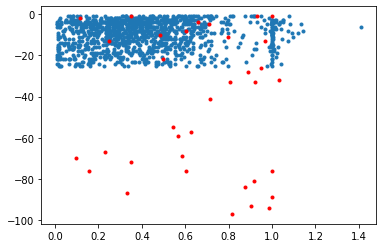

In [104]:
plt.plot(wdss['english_percentage'], -1*wdss['peak_position'], '.')
plt.plot(h100_subcharts['english_percentage'], -1*h100_subcharts['peak_position'], '.', color='red')